In [67]:
# Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from IPython.display import display

 
## This statement allows the visuals to render within your Jupyter Notebook.
# %matplotlib inline

## Loading the data


In [68]:
# Loading the data
# Read in the CSV files and convert them into Pandas DataFrames
years = [2015, 2016, 2017, 2018, 2019]
files = [f"{year}.csv" for year in years]
dfs = {year: pd.read_csv(file) for year, file in zip(years, files)}

### Viewing the dataframe


In [69]:
# Viewing the dataframe
# Display the first few rows of the DataFrame for all years
for year, df in dfs.items():
    print(f"\nData for {year} (First 5 rows):")
    display(df.head())


Data for 2015 (First 5 rows):


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176



Data for 2016 (First 5 rows):


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596



Data for 2017 (First 5 rows):


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182



Data for 2018 (First 5 rows):


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357



Data for 2019 (First 5 rows):


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [70]:
# Display the last few rows of the DataFrame for all years
for year, df in dfs.items():
    print(f"\nData for {year} (Last 5 rows):")
    display(df.tail())


Data for 2015 (Last 5 rows):


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726



Data for 2016 (Last 5 rows):


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404



Data for 2017 (Last 5 rows):


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005



Data for 2018 (Last 5 rows):


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076



Data for 2019 (Last 5 rows):


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [71]:
# Get the shape of all datasets
for year, df in dfs.items():
    print(f"Dataset {year}: {df.shape}")

Dataset 2015: (158, 12)
Dataset 2016: (157, 13)
Dataset 2017: (155, 12)
Dataset 2018: (156, 9)
Dataset 2019: (156, 9)


## 1. Data Profiling:


In [72]:
# Display all columns for each year
for year, df in dfs.items():
    print(f"\nColumns in {year}:")
    print(df.columns.tolist())


Columns in 2015:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columns in 2016:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columns in 2017:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

Columns in 2018:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

Columns in 2019:
['Overall rank',

In [73]:
# Display all information available for all years
for year, df in dfs.items():
    print(f"\nInfo for {year}:")
    print(df.info())


Info for 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)

In [74]:
# Display statistics for categorical and numerical columns for all years
for year, df in dfs.items():
    print(f"\nStatistics for {year}:")
    print("Categorical Data:")
    display(df.describe(include='object'))
    print("Numerical Data:")
    display(df.describe(include='number'))


Statistics for 2015:
Categorical Data:


,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


Numerical Data:


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140



Statistics for 2016:
Categorical Data:


,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


Numerical Data:


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720



Statistics for 2017:
Categorical Data:


,Country
count,155
unique,155
top,Norway
freq,1


Numerical Data:


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485



Statistics for 2018:
Categorical Data:


,Country or region
count,156
unique,156
top,Finland
freq,1


Numerical Data:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000



Statistics for 2019:
Categorical Data:


,Country or region
count,156
unique,156
top,Finland
freq,1


Numerical Data:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Data Quality Checks


#### 1. Reliability:


In [75]:
# Data is derived from Kaggle and listed its sources under.


#### 2. Timeliness: 


In [76]:
# In this Usecase, timeliness is critical for the analysis.
# The problem does not depend on being up-to-date nor asks for a specific period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [77]:
# Standardize column names across all datasets for consistency
for df in dfs.values():
    df.columns = df.columns.str.lower().str.replace(' ', '_')

In [78]:
# Removing irrelevant columns
columns_to_drop = {
    2015: ["standard_error"],
    2016: ["upper_confidence_interval", "lower_confidence_interval"],
    2017: ["whisker.low", "whisker.high"],
}
for year, cols in columns_to_drop.items():
    dfs[year].drop(cols, axis=1, inplace=True)

In [79]:
# Checking for duplicate rows
for year, df in dfs.items():
    print(f"\nNumber of duplicate rows in {year}: {df.duplicated().sum()}")


Number of duplicate rows in 2015: 0

Number of duplicate rows in 2016: 0

Number of duplicate rows in 2017: 0

Number of duplicate rows in 2018: 0

Number of duplicate rows in 2019: 0


In [80]:
# Checking for missing values
for year, df in dfs.items():
    print(f"\nMissing values in {year}:")
    print(df.isnull().sum().sort_values(ascending=False))


Missing values in 2015:
country                          0
region                           0
happiness_rank                   0
happiness_score                  0
economy_(gdp_per_capita)         0
family                           0
health_(life_expectancy)         0
freedom                          0
trust_(government_corruption)    0
generosity                       0
dystopia_residual                0
dtype: int64

Missing values in 2016:
country                          0
region                           0
happiness_rank                   0
happiness_score                  0
economy_(gdp_per_capita)         0
family                           0
health_(life_expectancy)         0
freedom                          0
trust_(government_corruption)    0
generosity                       0
dystopia_residual                0
dtype: int64

Missing values in 2017:
country                          0
happiness.rank                   0
happiness.score                  0
economy..gdp.per.capita.

In [81]:
# Handling missing values
if 'perceptions_of_corruption' in dfs[2018].columns:
    dfs[2018]['perceptions_of_corruption'].fillna('Unknown!', inplace=True)

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [82]:
# 1- Sample Appropriatness:

#### 2- Variable Selection:


#### 5. Uniqueness: 


In [83]:
# 1- Check for and remove duplicate records to prevent skewed analysis results.


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [84]:
# Cleaning columns:

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

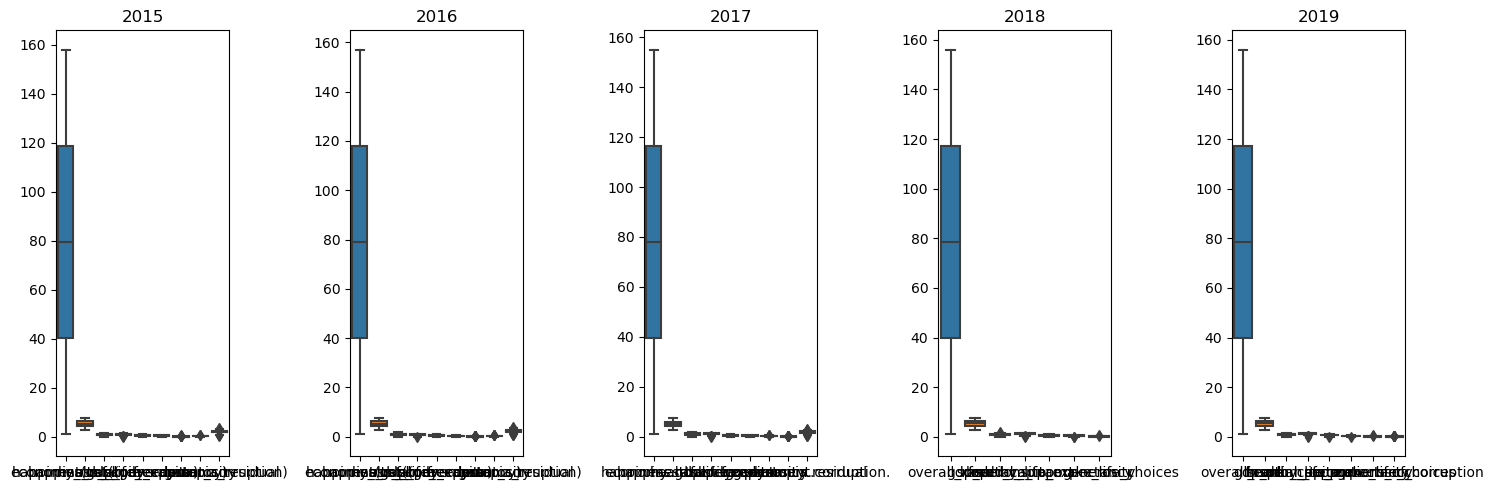

In [85]:
# Identifying and handling outliers
plt.figure(figsize=(15, 5))
for i, (year, df) in enumerate(dfs.items()):
    plt.subplot(1, len(dfs), i + 1)
    sns.boxplot(data=df.select_dtypes(include=[np.number]))
    plt.title(f"{year}")
plt.tight_layout()
plt.show()

In [86]:
# go to clean them 

In [87]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [88]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [89]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [90]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [91]:
# Convert categorical variables to a consistent format where needed
for year, df in dfs.items():
    if 'country' in df.columns:
        df['country'] = df['country'].str.title()

In [92]:
# Convert specific numerical values to appropriate types if necessary
for year, df in dfs.items():
    if 'happiness_rank' in df.columns:
        df['happiness_rank'] = df['happiness_rank'].astype(int)

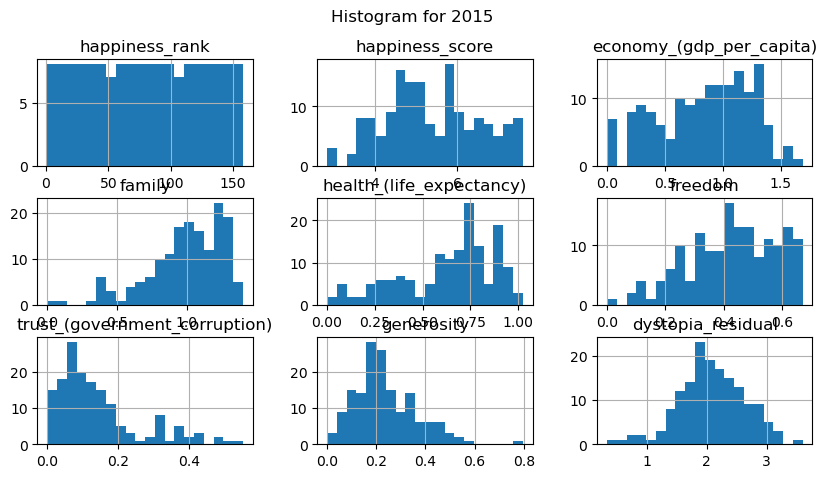

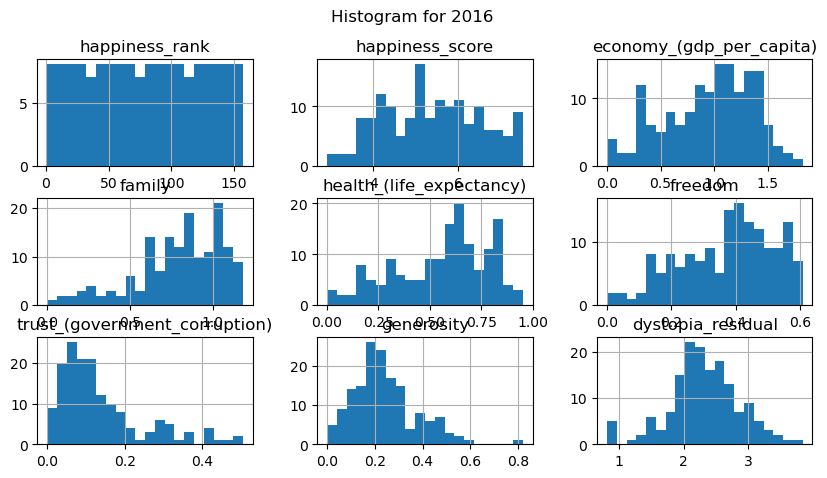

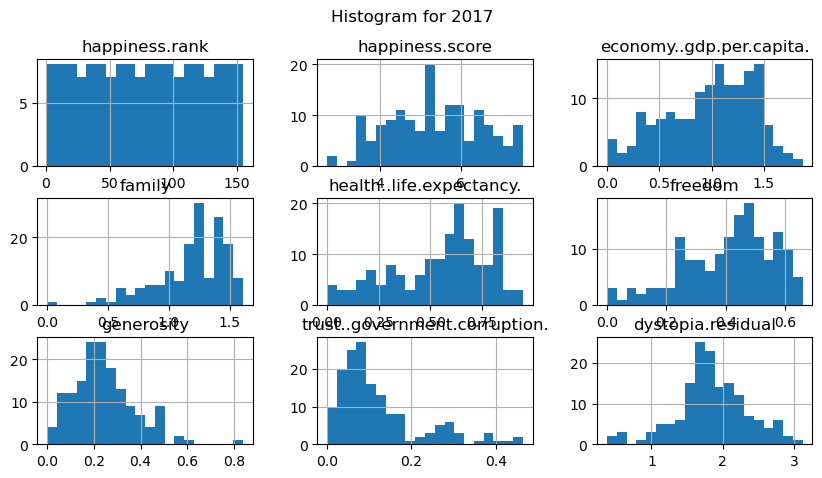

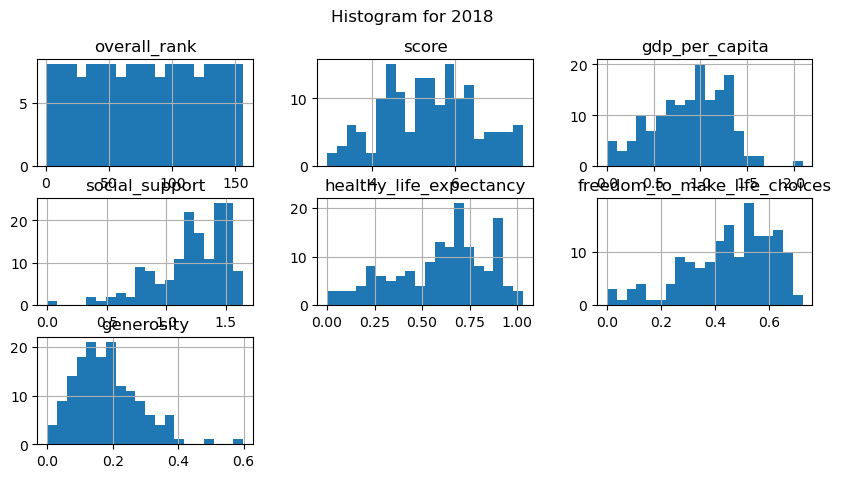

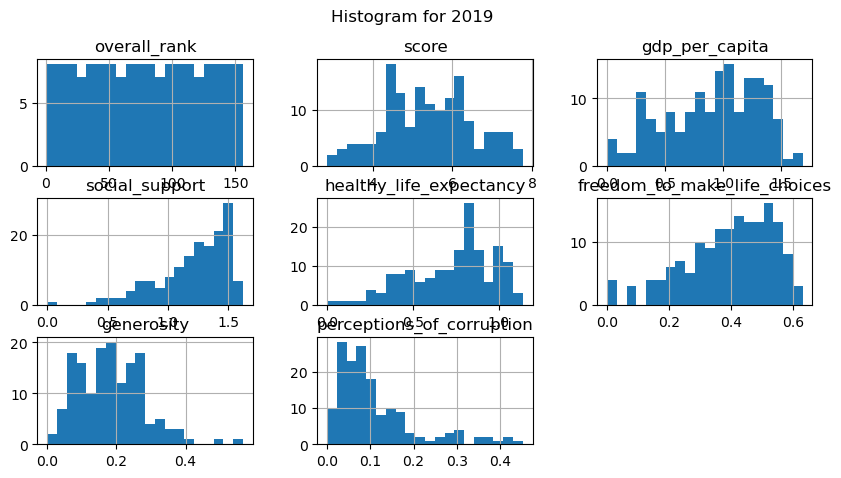

In [93]:
# Univariate Analysis
# Plot distributions of key numerical variables
for year, df in dfs.items():
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df[numerical_columns].hist(figsize=(10, 5), bins=20)
    plt.suptitle(f"Histogram for {year}")
    plt.show()



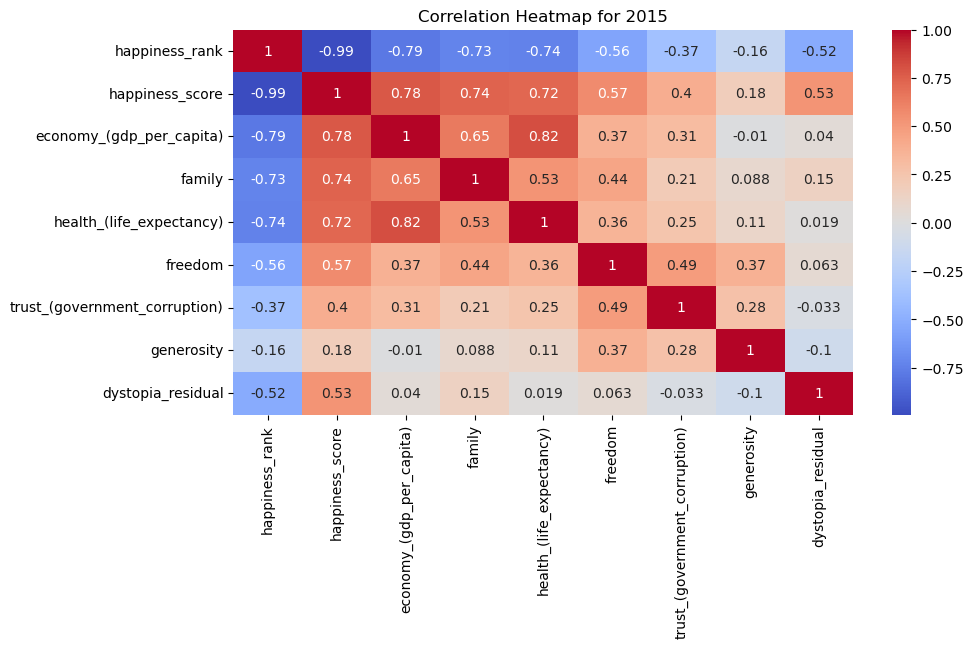

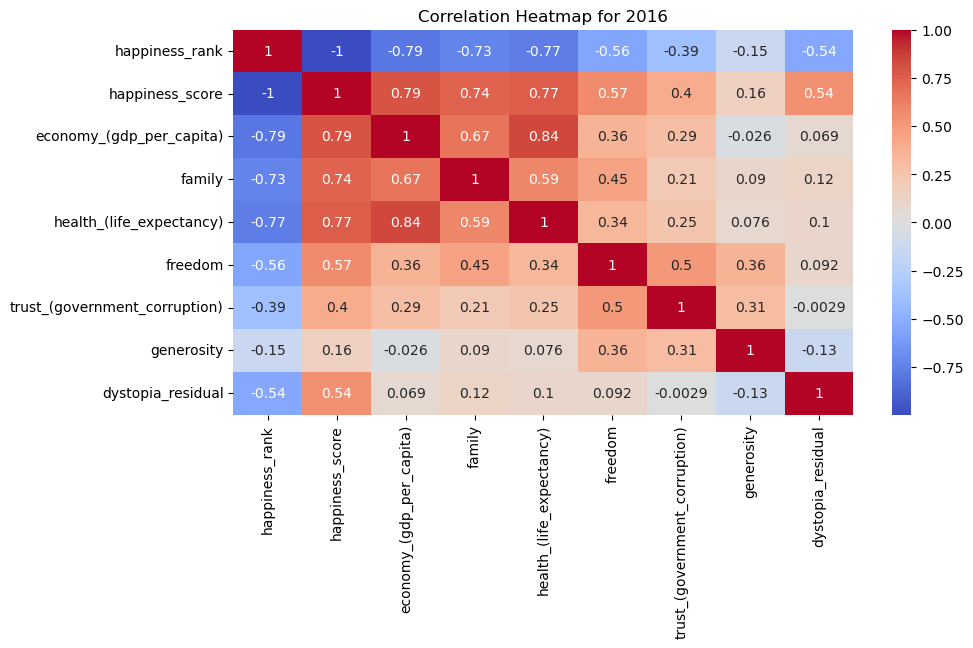

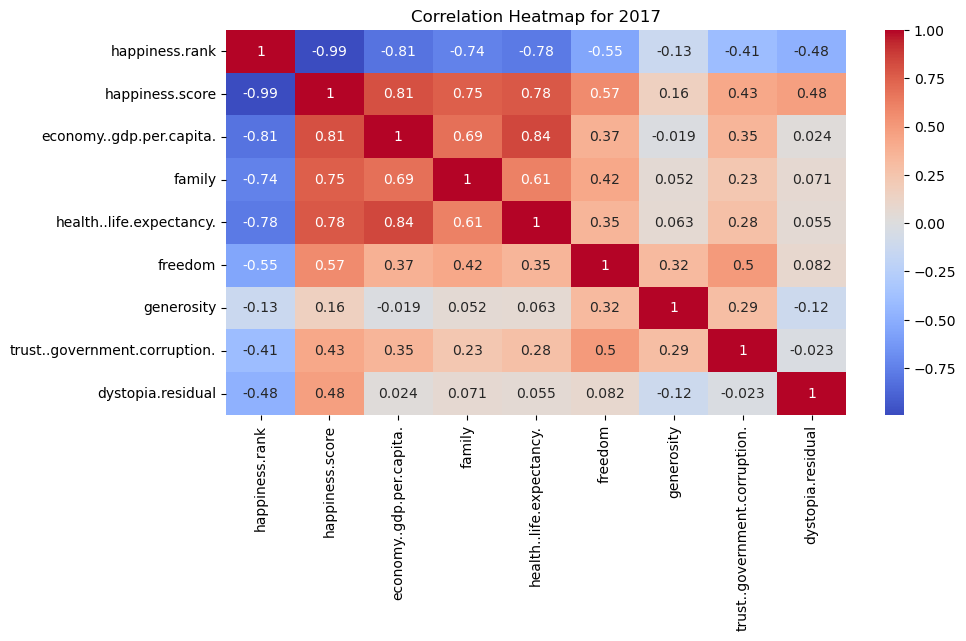

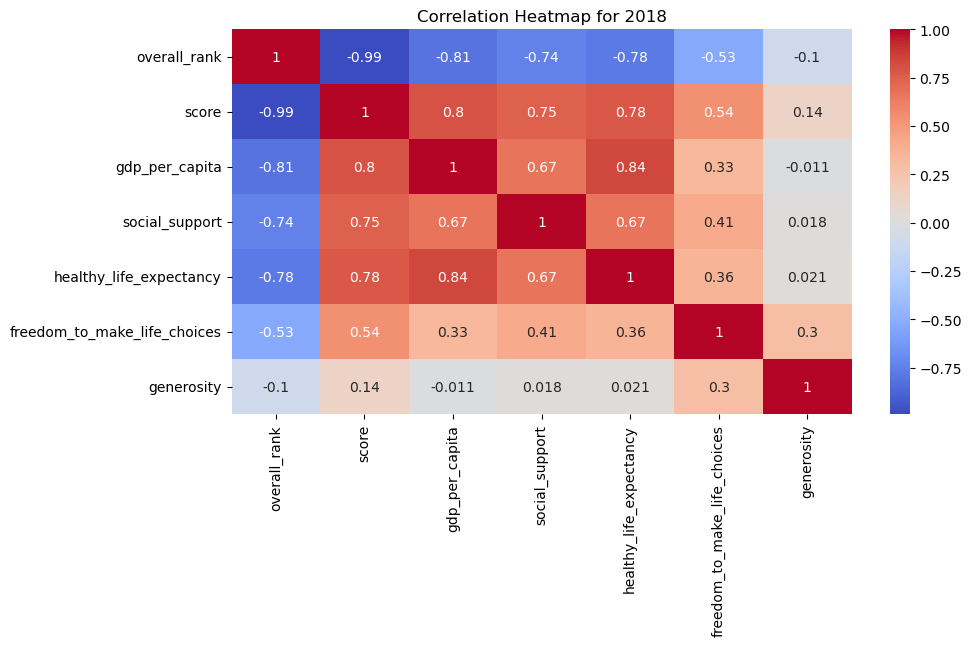

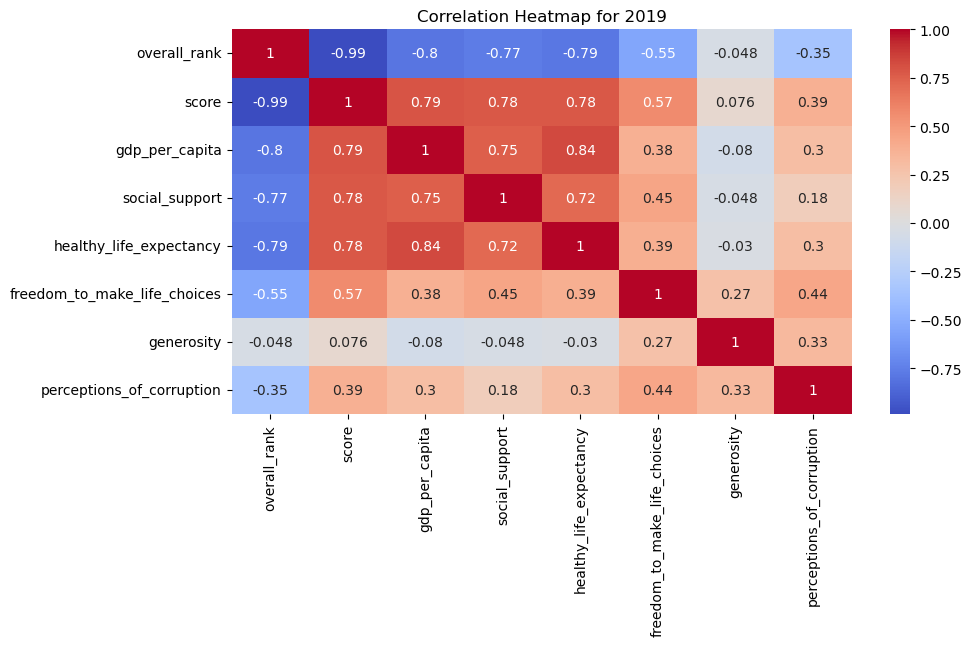

In [94]:
# Bivariate Analysis
# Example: Correlation Heatmap
for year, df in dfs.items():
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap for {year}")
    plt.show()

### Correcting errors

-------------------

In [95]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [ ]:
# Categorical & Categorical (Stacked Bar Chart)
for year, df in dfs.items():
    if len(categorical_columns) >= 2:
        plt.figure(figsize=(10, 5))
        crosstab_result = pd.crosstab(df[categorical_columns[0]], df[categorical_columns[1]])
        crosstab_result.div(crosstab_result.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"Stacked Bar Chart: {categorical_columns[0]} vs {categorical_columns[1]} in {year}")
        plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
# Categorical & Numerical (Box Plot, Scatter Plot)
for year, df in dfs.items():
    if categorical_columns.any() and numerical_columns.any():
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[categorical_columns[0]], y=df[numerical_columns[0]])
        plt.title(f"Box Plot: {categorical_columns[0]} vs {numerical_columns[0]} in {year}")
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], hue=df[categorical_columns[0]])
        plt.title(f"Scatter Plot: {numerical_columns[0]} vs {numerical_columns[1]} in {year}")
        plt.show()



Top 10 Happiest Countries in 2015:
       country  happiness_score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427
5      Finland            7.406
6  Netherlands            7.378
7       Sweden            7.364
8  New Zealand            7.286
9    Australia            7.284


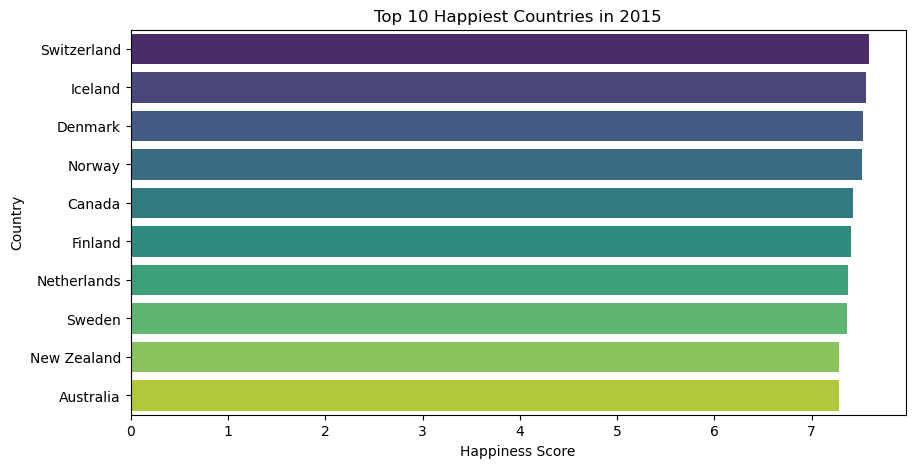


Top 10 Happiest Countries in 2016:
       country  happiness_score
0      Denmark            7.526
1  Switzerland            7.509
2      Iceland            7.501
3       Norway            7.498
4      Finland            7.413
5       Canada            7.404
6  Netherlands            7.339
7  New Zealand            7.334
8    Australia            7.313
9       Sweden            7.291


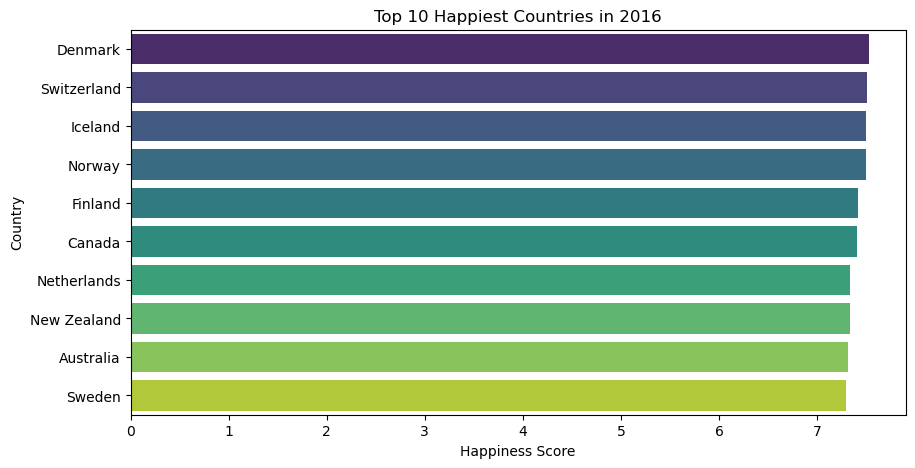

KeyError: "['happiness_score'] not in index"

In [ ]:

# Answering the Problem Statement Questions

# 1. What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?
for year, df in dfs.items():
    top_countries = df[['country', 'happiness_score']].sort_values(by='happiness_score', ascending=False).head(10)
    print(f"\nTop 10 Happiest Countries in {year}:")
    print(top_countries)

    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_countries['country'], x=top_countries['happiness_score'], palette='viridis')
    plt.xlabel("Happiness Score")
    plt.ylabel("Country")
    plt.title(f"Top 10 Happiest Countries in {year}")
    plt.show()


In [ ]:

# 2. How did country ranks or scores change between 2015 and 2016 as well as 2016 and 2017 reports?
def rank_changes(year1, year2):
    df1 = dfs[year1][['country', 'happiness_rank']].set_index('country')
    df2 = dfs[year2][['country', 'happiness_rank']].set_index('country')
    rank_diff = df1.join(df2, lsuffix=f'_{year1}', rsuffix=f'_{year2}')
    rank_diff['rank_change'] = rank_diff[f'happiness_rank_{year1}'] - rank_diff[f'happiness_rank_{year2}']
    rank_diff.dropna(inplace=True)
    return rank_diff

for y1, y2 in [(2015, 2016), (2016, 2017)]:
    rank_diff = rank_changes(y1, y2)
    print(f"\nHappiness Rank Changes from {y1} to {y2}:")
    print(rank_diff.sort_values(by='rank_change', ascending=False).head(10))

    plt.figure(figsize=(10, 5))
    sns.barplot(y=rank_diff.head(10).index, x=rank_diff.head(10)['rank_change'], palette='coolwarm')
    plt.xlabel("Rank Change")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries with Most Rank Change ({y1} to {y2})")
    plt.show()



Countries with Most Significant Change in Happiness Score (2015 to 2016):
                    happiness_score  happiness_score_2016  score_change
country                                                                
Algeria                       5.605                 6.355         0.750
Togo                          2.839                 3.303         0.464
Latvia                        5.098                 5.560         0.462
Romania                       5.124                 5.528         0.404
Hungary                       4.800                 5.145         0.345
Senegal                       3.904                 4.219         0.315
Tunisia                       4.739                 5.045         0.306
Lebanon                       4.839                 5.129         0.290
Nepal                         4.514                 4.793         0.279
Dominican Republic            4.885                 5.155         0.270


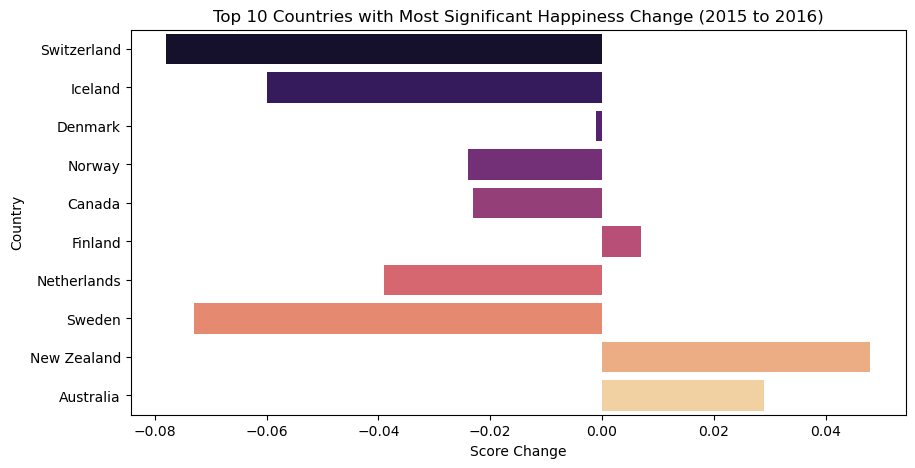

KeyError: "None of [Index(['happiness_score'], dtype='object')] are in the [columns]"

In [97]:

# 3. Did any country experience a significant increase or decrease in happiness?
for year in years[:-1]:
    next_year = year + 1
    if next_year in dfs:
        score_diff = dfs[year].set_index('country')[['happiness_score']].join(
            dfs[next_year].set_index('country')[['happiness_score']], rsuffix=f'_{next_year}')
        score_diff.dropna(inplace=True)
        score_diff['score_change'] = score_diff[f'happiness_score_{next_year}'] - score_diff['happiness_score']
        print(f"\nCountries with Most Significant Change in Happiness Score ({year} to {next_year}):")
        print(score_diff.sort_values(by='score_change', ascending=False).head(10))

        plt.figure(figsize=(10, 5))
        sns.barplot(y=score_diff.head(10).index, x=score_diff.head(10)['score_change'], palette='magma')
        plt.xlabel("Score Change")
        plt.ylabel("Country")
        plt.title(f"Top 10 Countries with Most Significant Happiness Change ({year} to {next_year})")
        plt.show()


Happiest and Least Happy Regions in 2015:
region
Sub-Saharan Africa                 4.202800
Southern Asia                      4.580857
Southeastern Asia                  5.317444
Central and Eastern Europe         5.332931
Middle East and Northern Africa    5.406900
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Western Europe                     6.689619
North America                      7.273000
Australia and New Zealand          7.285000
Name: happiness_score, dtype: float64


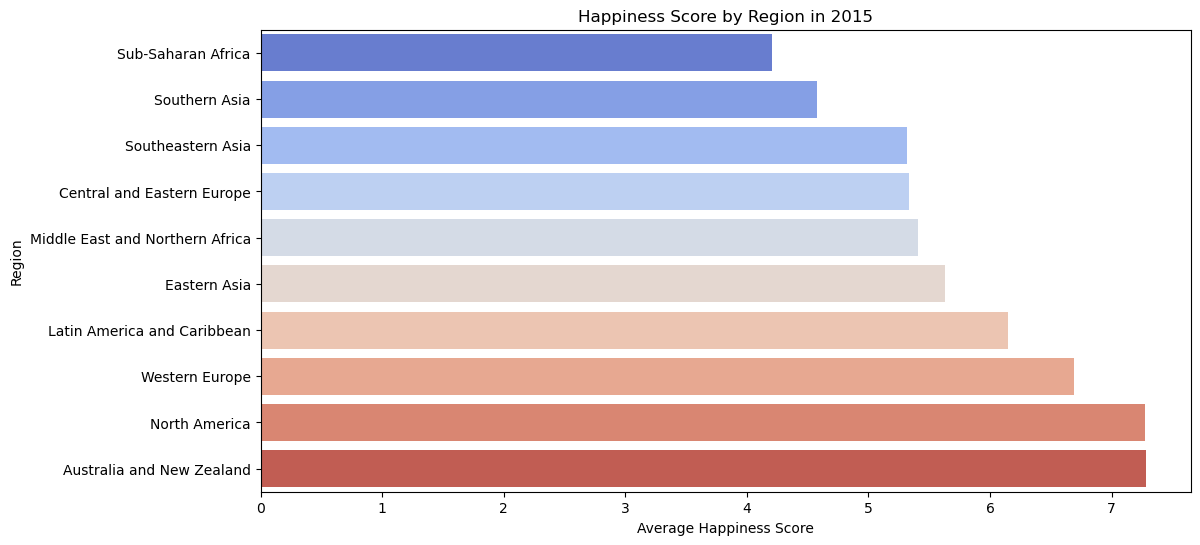


Happiest and Least Happy Regions in 2016:
region
Sub-Saharan Africa                 4.136421
Southern Asia                      4.563286
Southeastern Asia                  5.338889
Central and Eastern Europe         5.370690
Middle East and Northern Africa    5.386053
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Western Europe                     6.685667
North America                      7.254000
Australia and New Zealand          7.323500
Name: happiness_score, dtype: float64


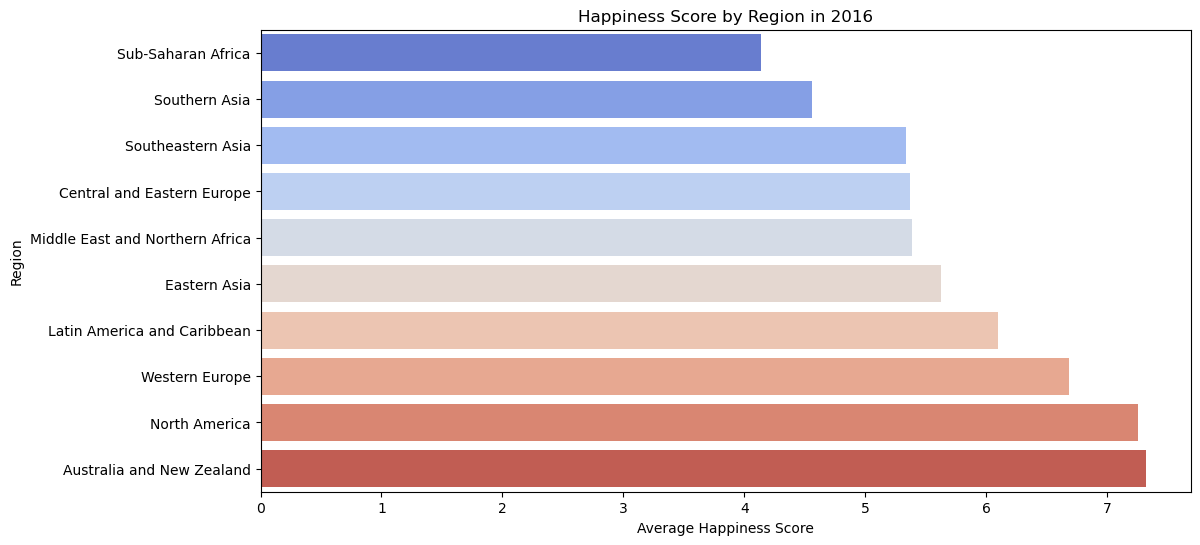

In [98]:
# Additional insights
# What are the happiest and least happy regions across the years?
for year, df in dfs.items():
    if 'region' in df.columns:
        region_avg_happiness = df.groupby('region')['happiness_score'].mean().sort_values()
        print(f"\nHappiest and Least Happy Regions in {year}:")
        print(region_avg_happiness)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(y=region_avg_happiness.index, x=region_avg_happiness.values, palette='coolwarm')
        plt.xlabel("Average Happiness Score")
        plt.ylabel("Region")
        plt.title(f"Happiness Score by Region in {year}")
        plt.show()
